In [1]:
!ls -l data

total 5809664
-rw-rw-r-- 1 jorge jorge 219359874 mar  9 10:52 compilado_datos_NASA.csv
-rw-rw-r-- 1 jorge jorge 270841768 mar 12 15:46 compilado_NASA_area_influencia.csv
-rw-rw-r-- 1 jorge jorge      2037 mar  2 14:30 Coordenadas_caniones.csv
-rw-rw-r-- 1 jorge jorge   8372215 feb 28 22:50 dataEstacionFresno.csv
-rw-rw-r-- 1 jorge jorge  46124550 mar  6 22:06 dataFromCanionesTestNASA_2014.csv
-rw-rw-r-- 1 jorge jorge  56696895 mar  7 23:22 dataFromCanionesTestNASA_2015.csv
-rw-rw-r-- 1 jorge jorge  56744086 mar  8 01:56 dataFromCanionesTestNASA_2016.csv
-rw-rw-r-- 1 jorge jorge  51879077 mar  7 12:09 dataFromCanionesTestNASA_2017.csv
-rw-rw-r-- 1 jorge jorge 380043467 mar 13 14:26 data_from_wrf_30min.csv
-rw-rw-r-- 1 jorge jorge 398172378 mar 13 14:31 data_from_wrf_30min_post_processing.csv
-rw-rw-r-- 1 jorge jorge 325209159 mar 11 12:24 data_wrf_nasa.csv
-rw-rw-r-- 1 jorge jorge 381088049 mar 13 14:07 data_wrf_sin_ultima_hora.csv
-rw-rw-r-- 1 jorge jorge 157246818 mar  2 19:30 datos_i

In [2]:
# librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dataNasa = pd.read_csv("data/compilado_datos_NASA.csv")

In [5]:
dataWrf = pd.read_csv("data/data_from_wrf_30min_post_processing.csv")

In [6]:
dataNasa.head()

,Unnamed: 0,Canon,Estado,Nombre,Long,Lat,Year,Month,Day,Hour,RainIMR
0,0,1,MICH,La Alberca,-102.006289,19.474989,2014,12,13,450,0.0
1,1,2,MICH,El Costo,-102.064453,19.448556,2014,12,13,450,0.0
2,2,3,MICH,El Fresno,-102.083000,19.492444,2014,12,13,450,0.0
3,3,4,MICH,Pajas 1,-102.061333,19.500167,2014,12,13,450,0.0
4,4,5,MICH,Pajas 2,-102.056250,19.510333,2014,12,13,450,0.0


In [7]:
dataWrf.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Canon,Estado,Nombre,Long,Lat,Year,Month,Day,Hour,GraupelWRF,RainWRF,TproWRF,Hora_Formato
0,0,0,0,1,MICH,La Alberca,-102.006289,19.474989,2017,8,1,0.0,0.0,0.0,9.718108,00:00
1,1,1,1,1,MICH,La Alberca,-102.006289,19.474989,2017,8,1,0.5,0.0,0.0,3.527233,00:30
2,2,2,2,2,MICH,El Costo,-102.064453,19.448556,2017,8,1,0.0,0.0,0.0,9.824876,00:00
3,3,3,3,2,MICH,El Costo,-102.064453,19.448556,2017,8,1,0.5,0.0,0.0,3.565984,00:30
4,4,4,4,3,MICH,El Fresno,-102.083000,19.492444,2017,8,1,0.0,0.0,0.0,9.203693,00:00


In [8]:
def generarHora(h):
    hour = int(h / 60)
    if hour < 10:
        hour = "0{}".format(hour)
    minutes = h % 60
    if minutes < 10:
        minutes = "0{}".format(minutes)
    return "{}:{}".format(hour, minutes)

In [9]:
dataNasa["Hora_Formato"] = dataNasa.apply(lambda x: generarHora(x["Hour"]), axis=1)

In [10]:
dataNasa.head()

,Unnamed: 0,Canon,Estado,Nombre,Long,Lat,Year,Month,Day,Hour,RainIMR,Hora_Formato
0,0,1,MICH,La Alberca,-102.006289,19.474989,2014,12,13,450,0.0,07:30
1,1,2,MICH,El Costo,-102.064453,19.448556,2014,12,13,450,0.0,07:30
2,2,3,MICH,El Fresno,-102.083000,19.492444,2014,12,13,450,0.0,07:30
3,3,4,MICH,Pajas 1,-102.061333,19.500167,2014,12,13,450,0.0,07:30
4,4,5,MICH,Pajas 2,-102.056250,19.510333,2014,12,13,450,0.0,07:30


In [11]:
dataWrf.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Canon,Estado,Nombre,Long,Lat,Year,Month,Day,Hour,GraupelWRF,RainWRF,TproWRF,Hora_Formato
0,0,0,0,1,MICH,La Alberca,-102.006289,19.474989,2017,8,1,0.0,0.0,0.0,9.718108,00:00
1,1,1,1,1,MICH,La Alberca,-102.006289,19.474989,2017,8,1,0.5,0.0,0.0,3.527233,00:30
2,2,2,2,2,MICH,El Costo,-102.064453,19.448556,2017,8,1,0.0,0.0,0.0,9.824876,00:00
3,3,3,3,2,MICH,El Costo,-102.064453,19.448556,2017,8,1,0.5,0.0,0.0,3.565984,00:30
4,4,4,4,3,MICH,El Fresno,-102.083000,19.492444,2017,8,1,0.0,0.0,0.0,9.203693,00:00


In [12]:
data = pd.merge(dataNasa, dataWrf, how='inner', on=['Long', 'Lat','Year','Month','Day','Hora_Formato'])

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3270528 entries, 0 to 3270527
Data columns (total 22 columns):
Unnamed: 0_x      int64
Canon_x           int64
Estado_x          object
Nombre_x          object
Long              float64
Lat               float64
Year              int64
Month             int64
Day               int64
Hour_x            int64
RainIMR           float64
Hora_Formato      object
Unnamed: 0_y      int64
Unnamed: 0.1      int64
Unnamed: 0.1.1    int64
Canon_y           int64
Estado_y          object
Nombre_y          object
Hour_y            float64
GraupelWRF        float64
RainWRF           float64
TproWRF           float64
dtypes: float64(7), int64(10), object(5)
memory usage: 573.9+ MB


In [14]:
data.columns

Index(['Unnamed: 0_x', 'Canon_x', 'Estado_x', 'Nombre_x', 'Long', 'Lat',
       'Year', 'Month', 'Day', 'Hour_x', 'RainIMR', 'Hora_Formato',
       'Unnamed: 0_y', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Canon_y', 'Estado_y',
       'Nombre_y', 'Hour_y', 'GraupelWRF', 'RainWRF', 'TproWRF'],
      dtype='object')

In [15]:
data = data[['Canon_x', 'Estado_x', 'Nombre_x', 'Long', 'Lat',
       'Year', 'Month', 'Day', 'Hour_x', 'RainIMR', 'Hora_Formato', 'GraupelWRF', 'RainWRF', 'TproWRF']]

In [16]:
data.to_csv("data/data_wrf_nasa.csv")

In [17]:
data.columns

Index(['Canon_x', 'Estado_x', 'Nombre_x', 'Long', 'Lat', 'Year', 'Month',
       'Day', 'Hour_x', 'RainIMR', 'Hora_Formato', 'GraupelWRF', 'RainWRF',
       'TproWRF'],
      dtype='object')

In [18]:
x = np.array(data["RainIMR"])
y = np.array(data["RainWRF"])

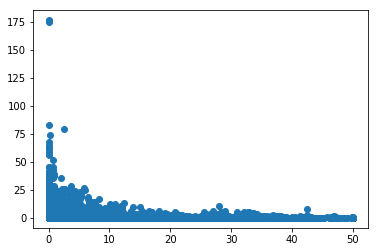

In [19]:
plt.scatter(x,y)

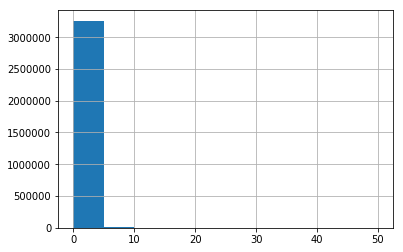

In [20]:
data["RainIMR"].hist(bins=10)

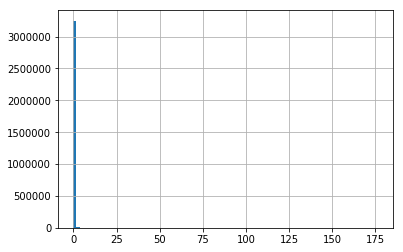

In [21]:
data["RainWRF"].hist(bins=100)

In [22]:
data["diffW_N"] = abs(data["RainIMR"] - data["RainWRF"])

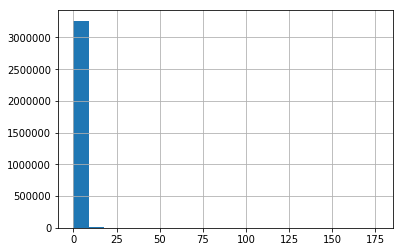

In [23]:
data["diffW_N"].hist(bins=20)

In [24]:
len(data[data["diffW_N"] > 0])

538633

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3270528 entries, 0 to 3270527
Data columns (total 15 columns):
Canon_x         int64
Estado_x        object
Nombre_x        object
Long            float64
Lat             float64
Year            int64
Month           int64
Day             int64
Hour_x          int64
RainIMR         float64
Hora_Formato    object
GraupelWRF      float64
RainWRF         float64
TproWRF         float64
diffW_N         float64
dtypes: float64(7), int64(5), object(3)
memory usage: 399.2+ MB
